# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bagus Tri Handoko
- **Email:** m295b4ky0799@bangkit.academy
- **ID Dicoding:** gusaguuss

# Menentukan Pertanyaan Bisnis
1. Pada hari apa saja rental sepeda meninggkat?
2. Pada jam berapa saja rental sepeda meningkat?
3. Bagaimana pengaruh musim dengan tingkat peminjaman sepeda?
4. Seberapa berpengaruh keadaan cuaca (weather_situation) dengan jumlah peminjam sepeda?
5. Bagaimana perbedaan tingkat pinjaman sepeda antara pengguna casual dan register?


# Import Library yang Dibutuhkan

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data Wrangling

### Gathering Data

In [5]:
#Load dataset day.csv
df_day = pd.read_csv('Data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#load dataset hour.csv
df_hour = pd.read_csv('Data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Kedua dataset disimpan dalam file csv

### Assesing Data

In [7]:
#See the information about dataset how many the colomn, what data tpye for every colomn and how many memory takes for the dataset
print(df_day.info())
print("==="*15)
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

In [8]:
# Check the missing value in dataset
print("Total of missing value in df_day:\n",df_day.isna().sum())
print("==="*15)
print("Total of missing value in df_hour:\n",df_hour.isna().sum())

Total of missing value in df_day:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Total of missing value in df_hour:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
#Check total duplicated data in dataset
print ("Total duplicated in data df_day: ",df_day.duplicated().sum())
print("Total duplicated in data df_hour: ", df_hour.duplicated().sum())

Total duplicated in data df_day:  0
Total duplicated in data df_hour:  0


In [10]:
# See the statistic parameter in the dataset df_day
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# See the statistic parameter in the dataset df_hour
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- berdasarkan penggunaan fungsi __.info__ data df_day memiliki 16 kolom dan 731 baris, dengan total memory sekitar 91.5 kb dan data df_hour memiliki 17 kolom dan 17379 baris, dengan total memory sekita 2.3 mb
- tidak ada duplikasi di kedua data
- tidak ada missing value di kedua data

### Cleaning Data

1. **Mengubah tipe data kolom dteday**  
    Pada kolom __dteday__ bertipe data objek atau string, yang dimana seharusnya menggunakan tipe data datetime karena kolom ini menampilkan informasi tanggal peminjaman sepeda.

In [12]:
#Mengubah tipe data dteday menggunakan fungsi pandas .to_datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

print(df_day['dteday'].dtype)
print(df_hour['dteday'].dtype)

datetime64[ns]
datetime64[ns]


2. **Merubah nama kolom**  
    Merubah nama kolom yang disingkat untuk memperjelas dan mempermudah pembacaan pada kolom tersebut seperti kolom __hr__ menjadi __hour__, __mnth__ menjadi __mounth__, __yr__ menjadi __year__, __temp__ menjadi __temperature__, __cnt__ menjadi __count__, __hum__ mejadi __humidity__ 

In [13]:
# Merubah nama kolom menggunaakan fungsi .rename
df_day.rename(columns={'mnth':'month', 'yr':'year','temp':'temperature', 'cnt':'count', 'hum':'humidity'}, inplace=True)
df_hour.rename(columns={'hr':'hour', 'mnth':'month', 'yr':'year','temp':'temperature', 'cnt':'count', 'hum':'humidity'}, inplace=True)

print(df_day.columns)
print(df_hour.columns)

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['instant', 'dteday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temperature', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


3. **Merubah isi kolom year**  
    Perubahan isi pada kolom __year__ bertujuan untuk memudahkan dalam analisis lebih lanjut, perubahan yang terjadi pada kolom __year__ adalah merubah nilai 0 menjadi 2011 dan 1 menjadi 2012. 

In [14]:
#Merubah nilai dari kolom year manggunakan fungsi .replace
df_day['year'].replace({0: '2011', 1: '2012'}, inplace=True)
df_hour['year'].replace({0: '2011', 1: '2012'}, inplace=True)

print(df_day['year'].head())
print(df_hour['year'].head())

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: object
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: object


4. **Membuang kolom yang tidak diperlukan**  
    Kolom instant tidak diperlukan karena tidak memiliki nilai yang berarti dimana kolom ini hanya menyimpan nilai index dari setiap kolom

In [15]:
#Membuang kolom instant menggunakan fungsi .drop
df_day.drop(['instant'],axis=1, inplace=True)
df_hour.drop(['instant'],axis=1, inplace=True)

print(df_day.columns)
print(df_hour.columns)

Index(['dteday', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temperature', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')
Index(['dteday', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


5. **Menormalisasi nilai temperature, atemp, humidity, dan windspeed**  
    Normalisasi nilai ini bertujuan untuk mengembalikan ke nilai asli, __temperature__ dikalikan dengan 41 untuk mengembalikan nilai suhu dalam derajat Celsius. __atemp__ dikalikan dengan 50 untuk mengembalikan nilai apparent temperature (suhu terasa). __humidity__ dikalikan dengan 100 untuk mendapatkan kelembapan dalam persen. __windspeed__ Dikalikan dengan 67 untuk mendapatkan kecepatan angin dalam km/jam.

In [16]:
df_day['temperature'] = df_hour['temperature'] * 41  # Nilai asli untuk temperatur
df_day['atemp'] = df_hour['atemp'] * 50  # Nilai asli untuk apparent temperature
df_day['humidity'] = df_day['humidity'] * 100  # Nilai asli untuk kelembapan (persentase)
df_day['windspeed'] = df_day['windspeed'] * 67  # Nilai asli untuk kecepatan angin (km/h)

df_hour['temperature'] = df_hour['temperature'] * 41  
df_hour['atemp'] = df_hour['atemp'] * 50  
df_hour['humidity'] = df_hour['humidity'] * 100  
df_hour['windspeed'] = df_hour['windspeed'] * 67

In [17]:
print(df_day[['temperature', 'atemp', 'humidity', 'windspeed',]].head())
print(df_hour[['temperature', 'atemp', 'humidity', 'windspeed',]].head())

   temperature   atemp  humidity  windspeed
0         9.84  14.395   80.5833  10.749882
1         9.02  13.635   69.6087  16.652113
2         9.02  13.635   43.7273  16.636703
3         9.84  14.395   59.0435  10.739832
4         9.84  14.395   43.6957  12.522300
   temperature   atemp  humidity  windspeed
0         9.84  14.395      81.0        0.0
1         9.02  13.635      80.0        0.0
2         9.02  13.635      80.0        0.0
3         9.84  14.395      75.0        0.0
4         9.84  14.395      75.0        0.0


In [18]:
#Melihat bentuk data df_day setelah dilakukan proses cleaning
df_day.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,2011,1,0,6,0,2,9.84,14.395,80.5833,10.749882,331,654,985
1,2011-01-02,1,2011,1,0,0,0,2,9.02,13.635,69.6087,16.652113,131,670,801
2,2011-01-03,1,2011,1,0,1,1,1,9.02,13.635,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,2011,1,0,2,1,1,9.84,14.395,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,2011,1,0,3,1,1,9.84,14.395,43.6957,12.522300,82,1518,1600


In [19]:
#Melihat bentuk data df_hour setelah dilakukan proses cleaning
df_hour.head()

,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,2011,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,1,2011,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,1,2011,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,1,2011,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,1,2011,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore korelasi setiap variabel

Explorasi ini bertujuan untuk melihat seberapa kuat korelasi dari setiap variabel atau kolom yang ada pada dataset ini, untuk melihat korelasi dari setiap variable akan menggunakan libary seaborn.

C:\Users\bagus\AppData\Local\Temp\ipykernel_16400\3695683703.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_hour.corr(), vmin=-1, vmax=1, annot=True, cmap='Reds')


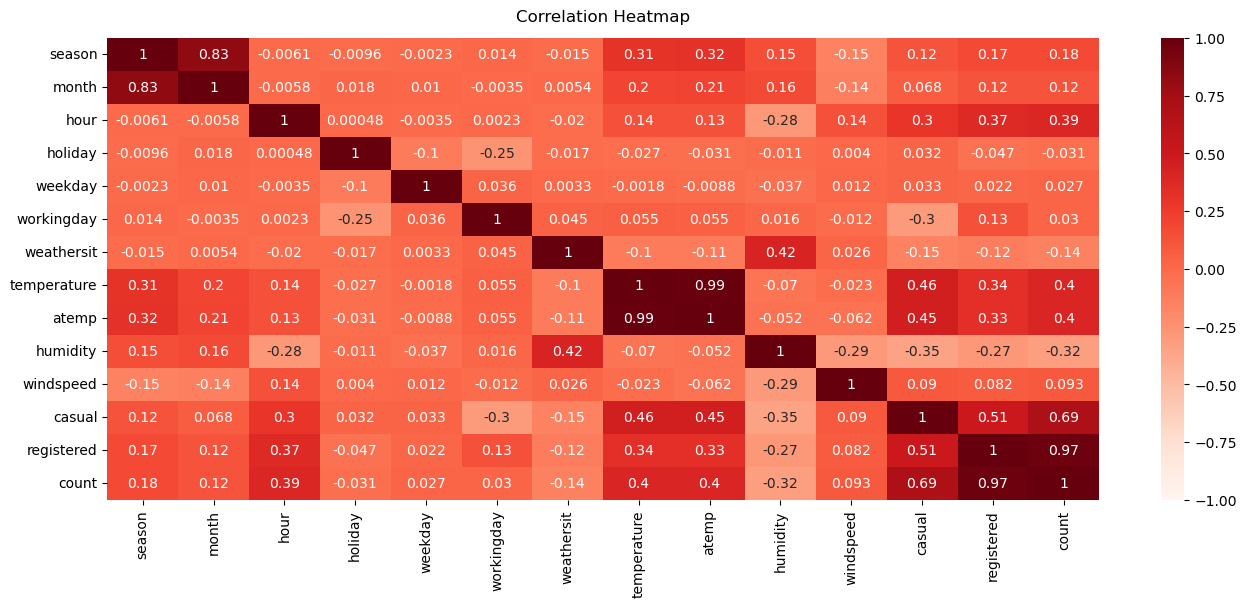

In [20]:
#Membuat heatmap corelation menggunakan fungsi .heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_hour.corr(), vmin=-1, vmax=1, annot=True, cmap='Reds')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Berdasarkan matriks korelasi diatas kita melihat bagaimana variabel dalam dataset berhubungan satu sama lain, menggunakan nilai korelasi dari 1 hingga -1. Dimana korelasi dengan nilai positif tertinggi adalah : __registered__ dan __count__, __temperature__ dan __count__, __registered__ dan __hour__, Selain itu kita dapat melihat korelasi nilai negatif tertinggi : __hour__ dan __humidity__, __humidity__ dan __registered__

In [21]:
df_hour.describe()

,season,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,1.106918,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apa saja rental sepeda meninggkat?

In [22]:
# Mengelompokkan data berdasarkan weekday dan menjumlahkan total peminjaman
weekday_rental = df_day.groupby('weekday').agg({'count': 'sum'}).reset_index()

# Menambahkan nama hari agar lebih mudah dibaca
weekday_rental['weekday_name'] = weekday_rental['weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Mengurutkan berdasarkan urutan hari dalam seminggu
weekday_rental = weekday_rental.sort_values('weekday')

print(weekday_rental.to_string(index=False))

 weekday  count weekday_name
       0 444027       Monday
       1 455503      Tuesday
       2 469109    Wednesday
       3 473048     Thursday
       4 485395       Friday
       5 487790     Saturday
       6 477807       Sunday


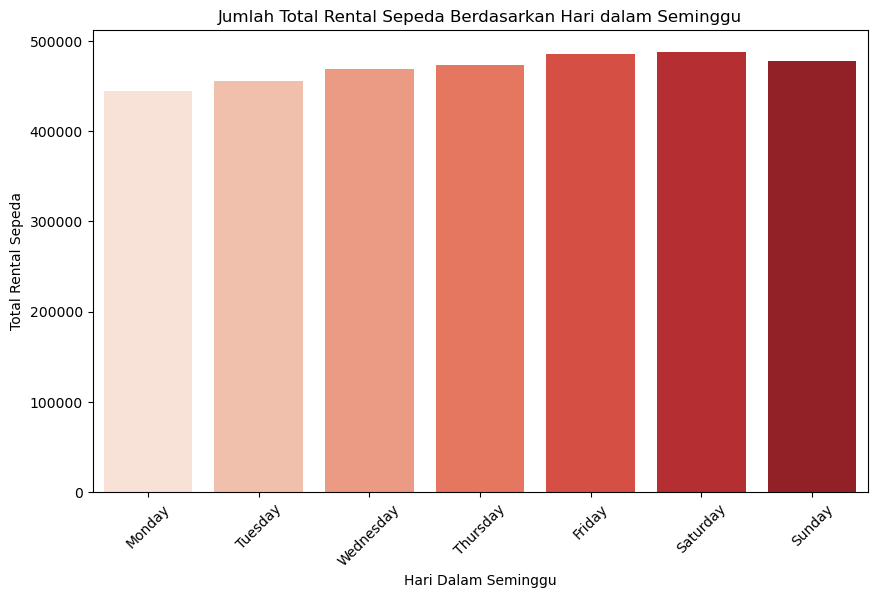

In [23]:
# Membuat plot total peminjaman sepeda berdasarkan hari menggunakan seaborn dan matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_name', y='count', data=weekday_rental, palette='Reds')
plt.title('Jumlah Total Rental Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari Dalam Seminggu')
plt.ylabel('Total Rental Sepeda')
plt.xticks(rotation=45)
plt.show()

**Insight**  
1. Berdasarkan hasil explorasi dan visualization diatas hari sabtu dan jumat merupakan hari dengan total jumlah peminjaman sepeda terbanyak, dimana hari sabtu sebanyak 487790 dan hari jumat sebanyak 485395. Sedangkan hari senin dan selasa adalah hari dengan total peminjaman sepeda yang paling sedikit, dimana total peminjaman di hari senin sebanyak 444027 dan hari selasa sebanyak 455503.
2. Analisis diatas membuktikan bahwa tren peminjaman sepeda meningkat ketika dihari weekend sabtu dan minggu dan hari menjelang weekend yakni hari jumat, dan tren peminjaman menurun ketika berganti ke hari weekday. Hal ini bisa terjadi karena semakin banyak orang yang keluar dihari weekend dibandingkan weekday.

### Pertanyaan 2: Pada jam berapa saja rental sepeda meningkat?

In [24]:
# Menghitung jumlah peminjaman rata-rata per jam
avg_hour = df_hour.groupby('hour')['count'].mean().reset_index()

# Menghitung Q1 (25th percentile) dan Q3 (75th percentile)
Q1 = avg_hour['count'].quantile(0.25)
Q3 = avg_hour['count'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan threshold cluster, nilai rata-rata di atas Q3 dianggap 'High', di bawah Q1 dianggap 'Low'
avg_hour['cluster'] = ['High' if x >= Q3 else 'Low' if x <= Q1 else 'Medium' for x in avg_hour['count']]

# Menampilkan hasil
avg_hour

,hour,count,cluster
0,0,53.898072,Low
1,1,33.375691,Low
2,2,22.869930,Low
3,3,11.727403,Low
4,4,6.352941,Low
5,5,19.889819,Low
6,6,76.044138,Medium
7,7,212.064649,Medium
8,8,359.011004,High
9,9,219.309491,Medium


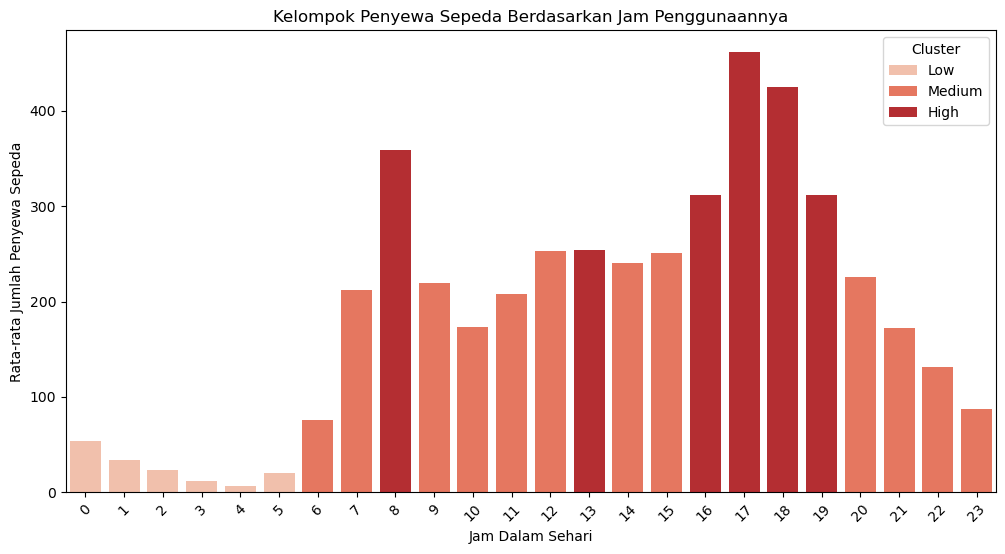

In [25]:
# Plot Clustering Analysis dengan barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='count', hue='cluster', data=avg_hour, palette='Reds', dodge=False, width=0.8)  # Atur lebar bar
plt.title('Kelompok Penyewa Sepeda Berdasarkan Jam Penggunaannya')
plt.xlabel('Jam Dalam Sehari')
plt.ylabel('Rata-rata Jumlah Penyewa Sepeda')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


**Insight**  
1. Jam dengan Peminjaman Rendah (Cluster Low):  
    - Jam 0 hingga jam 5 menunjukkan rata-rata peminjaman yang rendah.  
    - Ini wajar karena jam-jam ini berada di malam hingga dini hari, saat aktivitas umum cenderung menurun, dan sedikit orang yang meminjam sepeda.

2. Jam dengan Peminjaman Sedang (Cluster Medium):  
    - Jam 6 hingga jam 7 dan sebagian besar jam siang hingga malam (jam 9 hingga 22) berada dalam cluster "Medium".  
    - Ini menunjukkan adanya kenaikan aktivitas peminjaman sepeda di pagi hari (jam 6 hingga 7), serta jam-jam kerja dan sore hari (jam 9 hingga 22), meskipun tidak mencapai level yang tinggi.

3. Jam dengan Peminjaman Tinggi (Cluster High):  
    - Puncak peminjaman terjadi pada jam 8 pagi, 1 siang (jam 13), dan pada sore hingga malam hari (jam 16 hingga 19).  
    - Jam-jam ini kemungkinan besar terkait dengan jam sibuk masyarakat, seperti perjalanan ke tempat kerja pada pagi hari, makan siang, dan pulang kerja di sore hari. 
    - Jam-jam ini menunjukkan periode dengan permintaan tinggi untuk peminjaman sepeda.  

Berdasarkan analsisi diatas ada pola yang jelas dari aktivitas peminjaman sepeda yang rendah selama dini hari (jam 0 hingga 5), meningkat secara bertahap di pagi hari, mencapai puncaknya pada jam sibuk (jam 8 pagi dan sore), dan kemudian menurun lagi di malam hari.

### Pertanyaan 3: Bagaimana pengaruh musim dengan tingkat peminjaman sepeda?

In [26]:
# Memetakan season dengan nama musim
df_day['season'] = df_day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Menghitung statistik deskriptif dari peminjaman sepeda berdasarkan musim
weather_stats = df_day.groupby('season')['count'].describe()

# Menampilkan hasil
weather_stats

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,188.0,5644.303191,1459.800381,1115.0,4586.5,5353.5,6929.25,8714.0
Spring,181.0,2604.132597,1399.942119,431.0,1538.0,2209.0,3456.00,7836.0
Summer,184.0,4992.331522,1695.977235,795.0,4003.0,4941.5,6377.00,8362.0
Winter,178.0,4728.162921,1699.615261,22.0,3615.5,4634.5,5624.50,8555.0


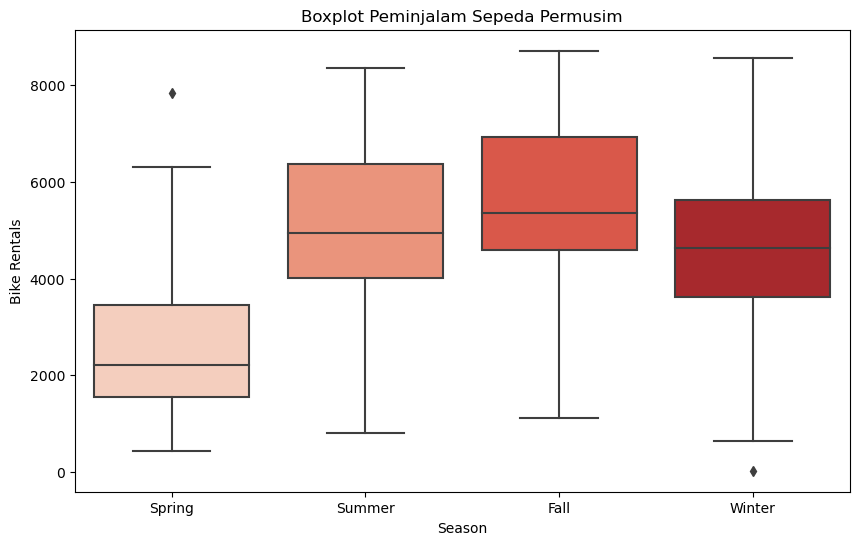

In [27]:
#Plot peminjaman rental permusim dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=df_day, palette='Reds')

# Menambahkan judul dan label sumbu
plt.title('Boxplot Peminjalam Sepeda Permusim')
plt.xlabel('Season')
plt.ylabel('Bike Rentals')
plt.show()

**Insight**
1. Rata-rata Peminjaman Sepeda disetiap Musim (mean):  
    - Musim Fall memiliki rata-rata jumlah peminjaman tertinggi, yaitu sekitar 5644 sepeda per hari.  
    - Musim Spring memiliki rata-rata peminjaman terendah, yaitu sekitar 2604 sepeda p.  
    - Musim Summer dan Winter memiliki rata-rata yang lebih tinggi dibandingkan Spring, namun masih di bawah Fall, masing-masing sekitar 4992 dan 4728.
2. Penyebaran Data peminjam disetiap Musim (std):  
    - Penyebaran peminjaman (standar deviasi) terbesar terlihat pada musim Fall (1459), diikuti oleh Summer dan Winter, yang menunjukkan bahwa variasi peminjaman sepeda di musim-musim ini cukup tinggi.
    - Musim Spring memiliki penyebaran yang sedikit lebih rendah dibandingkan musim lainnya, namun masih cukup tinggi.
3. Nilai Minimum dan Maximum (min):  
    - Musim Winter memiliki nilai peminjaman sepeda terendah, hanya 22 sepeda per hari, yang bisa menunjukkan bahwa di beberapa hari tertentu, peminjaman sangat rendah (kemungkinan dipengaruhi oleh cuaca salju ekstrem). Sedangkan musim lainnya memiliki nilai minimum yang relatif lebih tinggi, dimana musim Summer nilai peminjaman terendah sebanyak 4003, musim Spring nilai peminjaman terendah sebanyak 1538, dan musim Fall dengan nilai peminjaman terendahnya sebanyak 1115.
    - Musim Fall memiliki nilai peminjaman tertinggi dalam satu hari, yakni sebanyak 8714, sedangkan untuk musim Summer memiliki nilai tertinggi sebanyak 8555, musim Summer memiliki nilai peminjaman tertinggi sebanyak 8362, dan untuk musim Spring memiliki nilai tertinggin peminjaman paling rendah diantara musim lainnya, yakni sebanyak 7836

Secara umum, tren ini menunjukkan bahwa musim-musim seperti Fall dan Summer adalah periode sibuk untuk peminjaman sepeda, sementara Spring relatif lebih rendah, hal ini mungkin terjadi karena cuaca yang lebih menguntungkan ketika musim Fall dan Summer.

### Pertanyaan 4: Seberapa berpengaruh keadaan cuaca (weather_situation) dengan jumlah peminjam sepeda?

In [28]:
# Menghitung rata-rata peminjaman sepeda berdasarkan musim
weather_avg = df_day.groupby('weathersit')['count'].mean().reset_index()

# Memetakan nama musim
weather_avg['weathersit'] = weather_avg['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})

print(weather_avg)

   weathersit        count
0       Clear  4876.786177
1        Mist  4035.862348
2  Light Snow  1803.285714


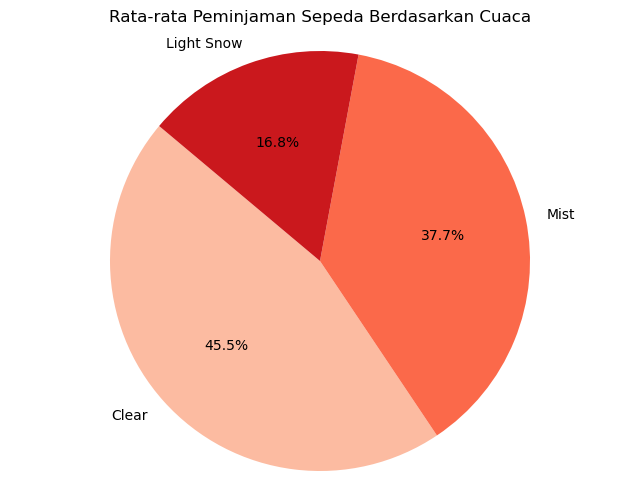

In [35]:
# Plot peminjaman sepeda berdasarkan cuaca menggunakan pie chart
plt.figure(figsize=(8, 6))
plt.pie(weather_avg['count'], labels=weather_avg['weathersit'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Reds", n_colors=len(weather_avg)))
plt.title('Plot Peminjaman Sepeda Berdasarkan Cuaca')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()

**Insight**  
1. Cuaca Jernih (Clear):  
    - Jumlah rata-rata peminjaman sepeda tertinggi terjadi saat cuaca jernih, yaitu sekitar 4.876 peminjaman. Ini menunjukkan bahwa pengguna lebih cenderung menyewa sepeda ketika cuaca cerah, yang mungkin dianggap lebih nyaman dan aman untuk bersepeda.
2. Kabut (Mist):  
    - Kondisi kabut atau berkabut (Mist) memiliki jumlah rata-rata peminjaman sekitar 4.036. Meskipun sedikit lebih rendah daripada cuaca cerah, kabut masih cukup populer di antara para pengguna, kemungkinan karena kondisi ini tidak terlalu ekstrem untuk bersepeda.
3. Salju Ringan (Light Snow):  
    - Jumlah peminjaman menurun drastis saat cuaca turun salju ringan, dengan rata-rata hanya sekitar 1.803 peminjaman. Cuaca bersalju, meskipun ringan, membuat kondisi bersepeda lebih sulit dan kurang nyaman, sehingga menyebabkan penurunan yang signifikan dalam jumlah peminjaman.

Kondisi cuaca memiliki pengaruh yang cukup signifikan terhadap tren peminjaman sepeda, dan pengguna lebih cenderung menyewa sepeda saat cuaca yang mendukung, seperti cuaca cerah atau sedikit kabut.

### Pertanyaan 5: Bagaimana perbedaan tingkat pinjaman sepeda antara pengguna casual dan register?

In [30]:
# Menghitung rata-rata peminjaman berdasarkan pengguna casual dan registered
user_type_rentals = df_day[['casual', 'registered']].mean().reset_index()
user_type_rentals.columns = ['user_type', 'avg_rentals']
user_type_rentals

,user_type,avg_rentals
0,casual,848.176471
1,registered,3656.172367


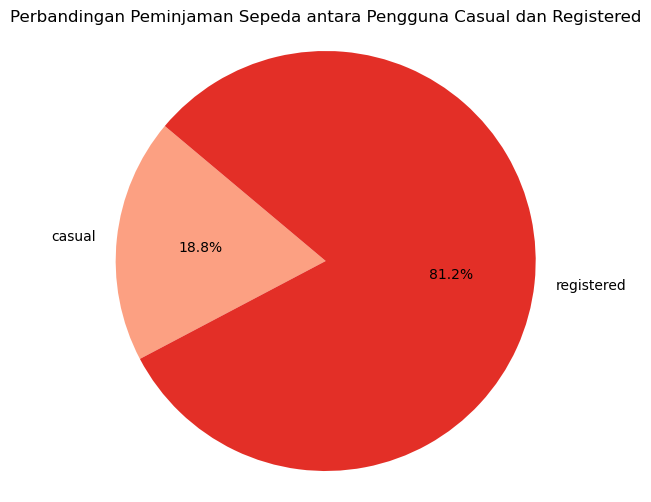

In [37]:
# Membuat pie chart untuk membandingkan rata-rata peminjaman sepeda
plt.figure(figsize=(8, 6))
plt.pie(user_type_rentals['avg_rentals'], labels=user_type_rentals['user_type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Reds", n_colors=len(user_type_rentals)))
plt.title('Perbandingan Peminjaman Sepeda antara Pengguna Casual dan Registered')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()

**Insight**
1. Pengguna Casual: Rata-rata peminjaman sepeda oleh pengguna casual adalah 848,18 sepeda.  
2. Pengguna Registered: Rata-rata peminjaman sepeda oleh pengguna registered jauh lebih tinggi, yaitu 3.656,17 sepeda.  

Dari anahasil diatas dapat disimpulkan bahwa peminjam sepeda yang terdaftar(regitered) meminjam sepeda jauh lebih sering daripada pengguna yang tidak terdaftar(Casual). Hal ini mungkin disebabkan oleh pengguna registered yang memiliki akses lebih rutin atau menggunakan layanan untuk keperluan harian, seperti bekerja atau transportasi sehari-hari, dibandingkan pengguna casual yang mungkin lebih jarang menggunakan layanan ini, misalnya untuk rekreasi atau penggunaan sesekali.

## RFM Analiysis

In [32]:
# Dapatkan tanggal terakhir untuk menghitung Recency
last_date = df_hour['dteday'].max()

# RFM Analysis berdasarkan 'registered' users
rfm_regis = df_hour.groupby('registered').agg(
    Recency=('dteday', lambda x: (last_date - x.max()).days),  # Recency: Jarak hari sejak transaksi terakhir
    Frequency=('dteday', 'count'),  # Frequency: Total jumlah transaksi
    Monetary=('count', 'sum')  # Monetary: Total peminjaman sepeda
).reset_index()

# Tampilkan hasil
rfm_regis

,registered,Recency,Frequency,Monetary
0,0,38,24,35
1,1,0,201,294
2,2,1,245,648
3,3,0,294,1154
4,4,3,307,1602
...,...,...,...,...
771,860,97,1,967
772,871,69,1,938
773,876,68,2,1916
774,885,102,1,976


In [33]:
# Calculate mean values for Recency, Frequency, and Monetary
mean_values = rfm_regis[['Recency', 'Frequency', 'Monetary']].mean()
mean_values

Recency        70.113402
Frequency      22.395619
Monetary     4243.143041
dtype: float64

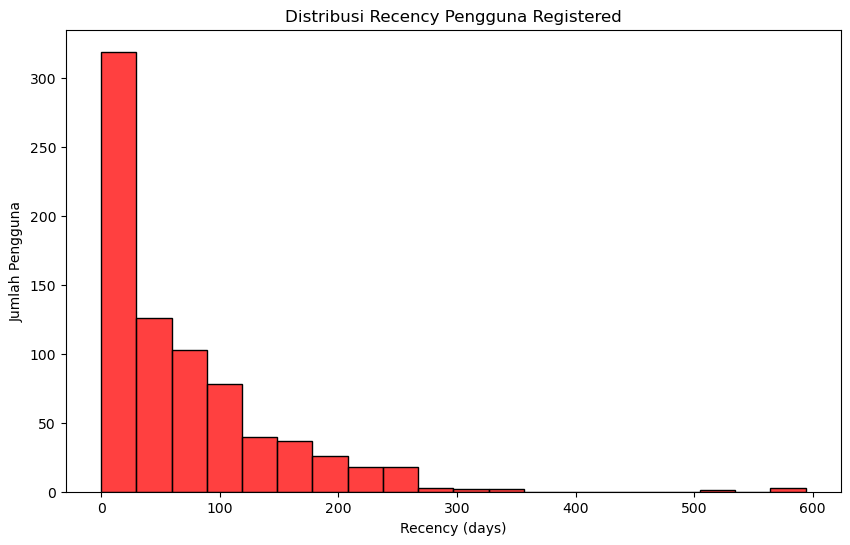

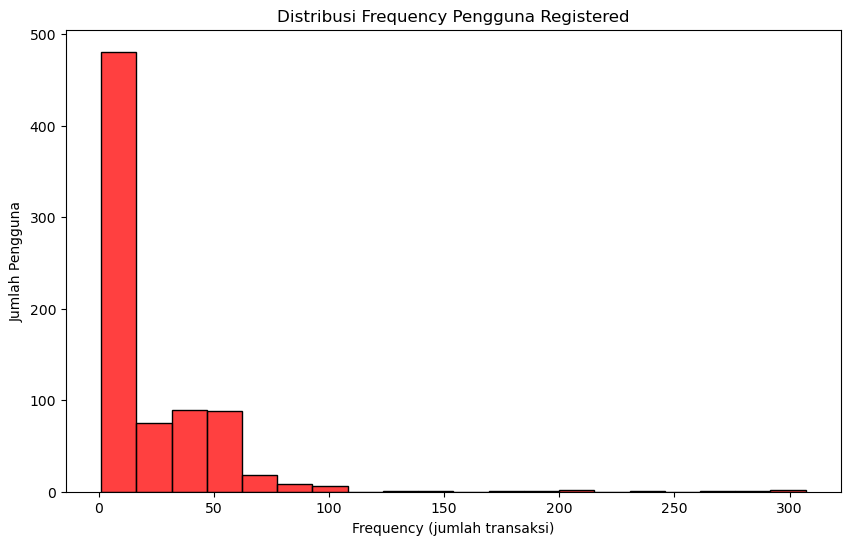

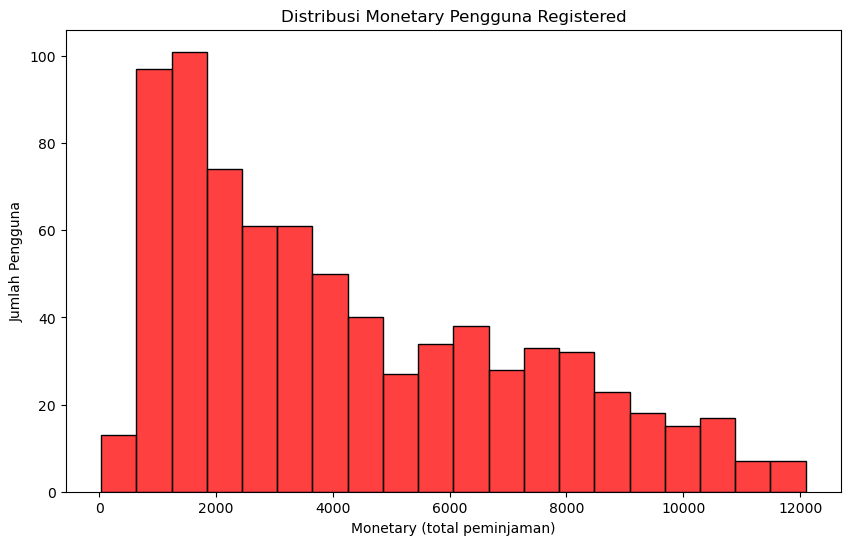

In [34]:
# Membuat list RFM features dan judul dari plot
rfm_features = ['Recency', 'Frequency', 'Monetary']
plot_titles = ['Distribusi Recency Pengguna Registered', 'Distribusi Frequency Pengguna Registered', 'Distribusi Monetary Pengguna Registered']
x_labels = ['Recency (days)', 'Frequency (jumlah transaksi)', 'Monetary (total peminjaman)']

# Loop through the RFM features and create plots
for feature, title, xlabel in zip(rfm_features, plot_titles, x_labels):
    plt.figure(figsize=(10, 6))
    sns.histplot(rfm_regis[feature], bins=20, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Jumlah Pengguna')
    plt.show()


**Insight**  
Dari informasi yang diberikan, kita dapat menarik beberapa kesimpulan terkait perilaku pengguna sepeda berdasarkan analisis RFM:
1. Recency (70.11 hari): Rata-rata pengguna terakhir kali melakukan peminjaman sepeda sekitar 70 hari yang lalu. Ini menunjukkan bahwa banyak pengguna yang tidak aktif baru-baru ini, sehingga dapat menjadi indikasi bahwa mereka mungkin perlu diingatkan atau diberikan insentif untuk kembali menggunakan layanan.

2. Frequency (22.40 transaksi): Rata-rata pengguna melakukan sekitar 22 peminjaman sepeda dalam periode yang diamati. Ini menunjukkan bahwa, meskipun tidak sering menggunakan layanan, pengguna yang ada melakukan beberapa transaksi.

3. Monetary (4243.14): Total peminjaman rata-rata per pengguna adalah sekitar 4243.14. Ini menunjukkan bahwa pengguna bersedia mengeluarkan sejumlah uang yang signifikan untuk layanan peminjaman sepeda, meskipun frekuensi peminjaman relatif rendah. 

## Conclusion

1. **Conclusion pertanyaan 1: Pada hari apa saja rental sepeda meninggkat?**  
Berdasarkan hasil analsis diatas hari Kamis, Jumat, Sabtu, dam Minggu merupakan hari dengan tingkat peminjaman paling tinggi, sedangkan hari Senin, Selasa, dan Rabu adalah hari dengan peminjaman sepeda yang cukup sedikit dibandingkan dengan hari lainnya. Hal ini dapat terjadi karena pada hari weekday lebih sedikit orang yang beraktifitas keluar dan pada weekend lebih banyak orang yang keluar, sehingga jumlah peminjaman sepeda lebih banyak pada hari weekend. Berikut adalah total dari peminjaman sepeda disetiap harinya:

       Monday        444027
       Tuesday       455503
       Wednesday     469109
       Thursday      473048
       Friday        485395
       Saturday      487790
       Sunday        477807

2. **Conclusion pertanyaan 2: Pada jam berapa saja rental sepeda meningkat?**  
Berdasarkan analisis peminjaman sepeda berdasarkan jam, terlihat adanya pola yang konsisten terkait aktivitas masyarakat:  
- __Peminjaman Rendah (Jam 0-5)__: Aktivitas peminjaman sangat rendah pada dini hari hingga subuh. Ini menunjukkan bahwa sedikit pengguna yang meminjam sepeda pada jam tersebut, yang masuk akal karena jam tersebut merupakan waktu istirahat bagi sebagian besar orang.  

- __Peminjaman Sedang (Jam 6-7, 9-22)__: Pada pagi hari dan selama jam kerja hingga malam, ada peningkatan aktivitas peminjaman. Ini mengindikasikan bahwa banyak orang mulai menggunakan sepeda pada pagi hari untuk memulai aktivitas atau bekerja, dan sore hari hingga malam dipenuhi dengan peminjaman sepeda yang lebih stabil.
- __Peminjaman Tinggi (Jam 8, 13, dan 16-19)__: Aktivitas tertinggi terjadi pada jam-jam sibuk, seperti jam 8 pagi, saat banyak orang mungkin menggunakan sepeda untuk perjalanan ke tempat kerja, serta jam makan siang (jam 13) dan jam pulang kerja (jam 16-19). Ini menunjukkan bahwa peminjaman sepeda sangat erat kaitannya dengan jadwal harian masyarakat dan puncaknya terjadi pada jam sibuk.  
Secara keseluruhan, tren ini mencerminkan bahwa peminjaman sepeda meningkat seiring dengan aktivitas harian masyarakat, khususnya selama jam sibuk pagi dan sore hari. Strategi operasional seperti penempatan sepeda tambahan di jam-jam sibuk dan optimalisasi pemeliharaan pada jam-jam rendah bisa membantu meningkatkan efisiensi layanan.

3. **Conclusion pertanyaan 3: Bagaimana pengaruh musim dengan tingkat peminjaman sepeda?**
- __Puncak Peminjaman__: Musim Fall dan Summer mencatat peminjaman tertinggi, didukung oleh cuaca yang kondusif.
- __Peminjaman Terendah__: Musim Spring memiliki peminjaman terendah, kemungkinan dipengaruhi oleh kondisi cuaca yang kurang optimal.
- __Variasi Peminjaman__: Musim Fall dan Winter menunjukkan variasi peminjaman tertinggi, dengan fluktuasi yang lebih besar karena faktor cuaca.
- __Peminjaman Minim di Winter__: Musim Winter mencatat peminjaman terendah, hanya 22 sepeda di hari-hari tertentu, kemungkinan besar karena cuaca ekstrem.  
Secara keseluruhan, Fall dan Summer adalah musim puncak, sedangkan Spring dan Winter lebih rendah karena cuaca.

4. **Conclusion pertanyaan 4: Seberapa berpengaruh keadaan cuaca (weather_situation) dengan jumlah peminjam sepeda?**
- __Cuaca Jernih (Clear)__: Peminjaman tertinggi terjadi saat cuaca cerah, dengan rata-rata sekitar 4.876 sepeda. Ini menunjukkan bahwa pengguna lebih cenderung menyewa sepeda ketika kondisi cuaca mendukung, seperti hari yang cerah, karena lebih nyaman dan aman untuk bersepeda.
- __Kabut (Mist)__: Meskipun sedikit menurun dibandingkan cuaca cerah, dengan rata-rata peminjaman sekitar 4.036 sepeda, cuaca berkabut masih cukup menarik bagi pengguna. Hal ini mungkin karena kabut tidak terlalu ekstrem dan masih memungkinkan untuk bersepeda.
- __Salju Ringan__ (Light Snow): Saat salju ringan turun, peminjaman menurun drastis menjadi sekitar 1.803 sepeda. Kondisi bersalju membuat bersepeda menjadi lebih sulit dan tidak nyaman, sehingga mengurangi minat pengguna dalam menyewa sepeda.  
Secara keseluruhan, tren peminjaman sepeda lebih tinggi pada cuaca yang cerah dan sedikit berkabut, namun menurun secara signifikan saat cuaca menjadi lebih buruk seperti salju, yang membuat bersepeda kurang ideal.